<a href="https://colab.research.google.com/github/SolverniaSolus/Pokedex/blob/main/pokedexV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Protótipo de classificação de Pokémons Lendários utilizando o modelo de IA SVM

### Importação das bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance



*   Importando
*   Item da lista



### Importação e Estruturação da Tabela contendo os 898 Pokémons


In [ ]:
data_url = 'pokemon.csv'

df = pd.read_csv(data_url, encoding='utf-16-le', delimiter='\t')
column_names = ['national_number','height_m','weight_kg','hp','sp_attack','sp_defense','speed','is_legendary']
df = df[column_names]
df.set_index('national_number', inplace=True)
# df['height_cm'] = df['height_m'] * 100
# df = df.drop('height_m', axis=1)


dfRef = pd.read_csv(data_url, encoding='utf-16-le', delimiter='\t')
column_names = ['national_number', 'english_name']
dfRef = dfRef[column_names]
dfRef.set_index('national_number', inplace=True)


df.head()

,height_m,weight_kg,hp,sp_attack,sp_defense,speed,is_legendary
national_number,,,,,,,
1,0.7,6.9,45,65,65,45,0
2,1.0,13.0,60,80,80,60,0
3,2.0,100.0,80,100,100,80,0
4,0.6,8.5,39,60,50,65,0
5,1.1,19.0,58,80,65,80,0


### Regulação da Tabela para treino do modelo, Divisão e Padronização dos Dados



In [ ]:
X = df.drop('is_legendary', axis=1) #coluna é 1; linha é 0
y = df['is_legendary']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Escolha e Inicialização do Modelo que será utilizado (SVM)

In [ ]:
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

### Plotagem do Modelo SVM usando Matrix de Confusão para observar os resultados

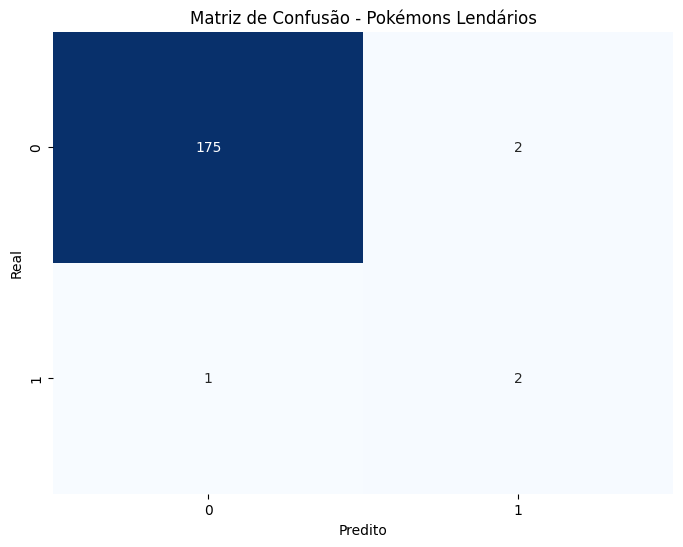

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       177
           1       0.50      0.67      0.57         3

    accuracy                           0.98       180
   macro avg       0.75      0.83      0.78       180
weighted avg       0.99      0.98      0.98       180



In [ ]:
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Pokémons Lendários')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, y_pred))

### Definição e Uso do GridSearchCV para ver os melhores Parâmetros e Estimadores

In [ ]:
# Definir os parâmetros para o GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100], # margem máxima do hiper plano, quanto menor o C menor a margem maxima
    'gamma': [1, 0.1, 0.01, 0.001], # aura dos pontos coordenados, quanto maior a aura, mais relativos são os pontos, quanto menor, mais individuais.
    'kernel': ['linear','rbf', 'poly']
}

# Instanciar o modelo SVM
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, scoring='accuracy')
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [ ]:
# Exibir os melhores parâmetros
print('Melhores parâmetros: ', grid.best_params_)
print('Melhor estimador: ', grid.best_estimator_)

Melhores parâmetros:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Melhor estimador:  SVC(C=1, gamma=1)


### Segunda Plotagem do Modelo SVM Usando dos melhores Parâmetros e Estimadores

Acertos:  national_number
717    1
Name: is_legendary, dtype: int64
                english_name
national_number             
717                  Yveltal

 
 
 Erros:  national_number
790    1
150    1
Name: is_legendary, dtype: int64
                english_name
national_number             
790                  Cosmoem
150                   Mewtwo


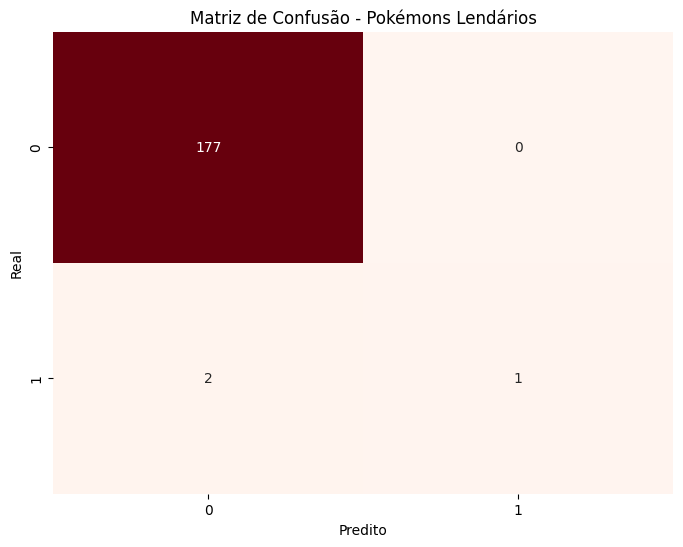

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       177
           1       1.00      0.33      0.50         3

    accuracy                           0.99       180
   macro avg       0.99      0.67      0.75       180
weighted avg       0.99      0.99      0.99       180



In [ ]:
# Previsões com o modelo otimizado
grid_predictions = grid.predict(X_test_scaled)

acertos = y_test[((y_test == grid_predictions) & (y_test == 1)) ]
print('Acertos: ',acertos)
print(dfRef.loc[acertos.index])


errors = y_test[(y_test != grid_predictions) ]
print('\n \n \n Erros: ', errors)
print(dfRef.loc[errors.index])


# Matriz de confusão e relatório de classificação
conf_matrix_grid = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_grid, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Matriz de Confusão - Pokémons Lendários')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, grid_predictions))

In [ ]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [ ]:
print(y_test[y_test == 1])

national_number
790    1
150    1
717    1
Name: is_legendary, dtype: int64


### Validação Cruzada dos Dados

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

data_url = 'pokemon.csv'

data = pd.read_csv(data_url, encoding='utf-16-le', delimiter='\t')
column_names = ['national_number','height_m','weight_kg','hp','attack','defense','sp_attack','sp_defense','speed','is_legendary']
data = data[column_names]

X = df.drop('is_legendary', axis=1) #coluna é 1; linha é 0
y = df['is_legendary']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

model = SVC(kernel='linear')
scores = cross_val_score(model, x_scaled, y, cv=5)

print("Pontuações da média de cada fold:", scores)
print("Acurácia média:", scores.mean())

Pontuações da média de cada fold: [0.97777778 0.97777778 0.97777778 0.97765363 0.97765363]
Acurácia média: 0.9777281191806331


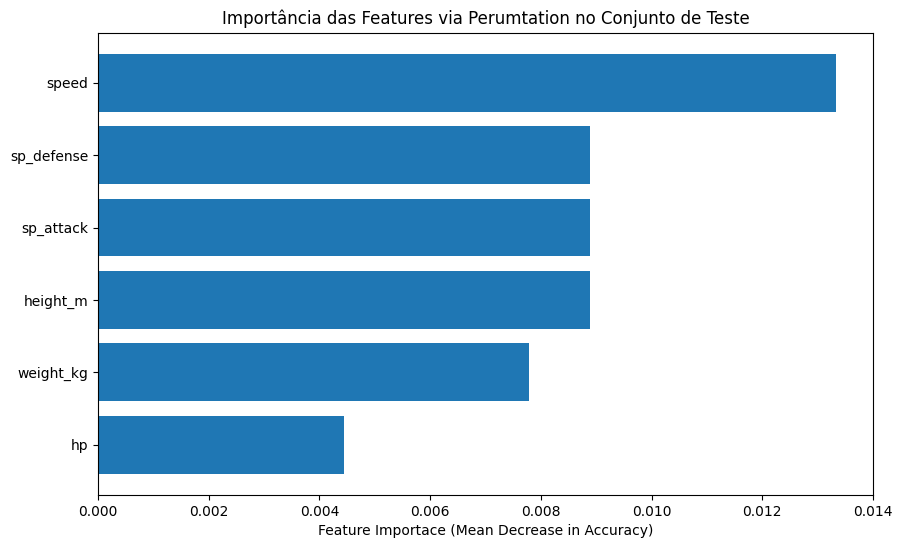

In [ ]:
result =  permutation_importance(model,X_test_scaled,y_test,n_repeats=10,random_state=32)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importace (Mean Decrease in Accuracy)')
plt.title('Importância das Features via Perumtation no Conjunto de Teste')
plt.show()

In [ ]:
fp_indices = np.where((grid_predictions == 1) & (y_test != 1))[0]
fn_indices = np.where((grid_predictions != 1) & (y_test == 1))[0]
fp_samples = X_test.iloc[fp_indices]
fn_samples = X_test.iloc[fn_indices]
correctly_classified_samples = X_test[(grid_predictions == y_test)]
fp_mean = fp_samples.mean()
fn_mean = fn_samples.mean()
correctly_classified_mean = correctly_classified_samples.mean()
comparison_df = pd.DataFrame({
    'False Positives': fp_mean,
    'False Negatives': fn_mean,
    'Correctly Classified': correctly_classified_mean
})
print('Comparação das Features (Médias):')
print(comparison_df)


Comparação das Features (Médias):
            False Positives  False Negatives  Correctly Classified
height_m                NaN             1.05              1.189888
weight_kg               NaN           560.95             69.594944
hp                      NaN            74.50             68.438202
sp_attack               NaN            91.50             64.853933
sp_defense              NaN           110.50             65.837079
speed                   NaN            83.50             66.971910
